# Continuous Control

---


### Start the Environment

Run the next code cell to install a few packages. This might take a few minutes to run.

In [1]:
import numpy as np
import gym
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='C:/Users/Remtasya/DDPG Actor-Critic Reinforcement Learning Reacher Environment/Reacher_Windows_x86_64/Reacher.app')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# size of each action
action_size = brain.vector_action_space_size

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

### Train a DDPG agent

Run the code cells below to train the agent.

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=np.random.randint(100))

Episode 1	 Score: 0.56e: 0.56
Episode 2	 Score: 0.49e: 0.52
Episode 3	 Score: 0.92e: 0.65
Episode 4	 Score: 1.02e: 0.75
Episode 5	 Score: 0.99e: 0.79
Episode 6	 Score: 1.13e: 0.85
Episode 7	 Score: 0.90e: 0.86
Episode 8	 Score: 1.23e: 0.90
Episode 9	 Score: 0.90e: 0.90
Episode 10	 Score: 1.23e: 0.94
Episode 11	 Score: 1.49e: 0.99
Episode 12	 Score: 1.31e: 1.01
Episode 13	 Score: 1.68e: 1.06
Episode 14	 Score: 2.65e: 1.18
Episode 15	 Score: 1.92e: 1.23
Episode 16	 Score: 2.00e: 1.28
Episode 17	 Score: 2.69e: 1.36
Episode 18	 Score: 3.12e: 1.46
Episode 19	 Score: 3.58e: 1.57
Episode 20	 Score: 3.65e: 1.67
Episode 21	 Score: 3.30e: 1.75
Episode 22	 Score: 3.65e: 1.84
Episode 23	 Score: 4.00e: 1.93
Episode 24	 Score: 4.94e: 2.06
Episode 25	 Score: 4.85e: 2.17
Episode 26	 Score: 4.72e: 2.27
Episode 27	 Score: 4.41e: 2.35
Episode 28	 Score: 4.64e: 2.43
Episode 29	 Score: 5.68e: 2.54
Episode 30	 Score: 5.04e: 2.62
Episode 30	Average Score: 2.62
Episode 31	 Score: 5.46e: 2.79
Episode 32	 Score

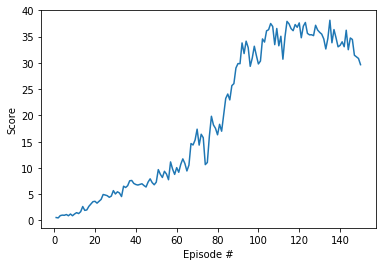

In [7]:
def ddpg(n_episodes=150, max_t=1000, print_every=30):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]  
            next_states, rewards, dones = env_info.vector_observations, env_info.rewards, env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if any(dones):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {}\t Score: {:.2f}'.format(i_episode, np.mean(score)))
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [8]:
env.close()